In [1]:
import torch
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(repo_root)


from src.utils import MNIST, total_variation_loss_model, evaluate_loss_acc
from src.model import CNN, MLP
from src.utils import MNIST, evaluate_loss_acc, LOGGER

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [2]:
DEVICE = "mps"

# Папка с чекпоинтами
CHECKPOINT_DIR = f"{repo_root}/data/checkpoints/exp3"

In [31]:
key = 'fc2.weight'
# key = 'layer1.0.weight'

ticks = 1
num_epochs = 5 
num_seeds = 1
values = []
losses = [] 

for i in range(num_seeds):
    LOGGER.reset()
    LOGGER.load(f'{CHECKPOINT_DIR}/MNIST_CNN_{ticks}tick_steps_{num_epochs}epochs_({i}_{num_seeds})seeds')
    values.append(LOGGER.dict[key])

    losses.append(LOGGER.dict['loss'])

losses = np.array(losses)
values = np.array(values)

In [32]:
values.shape

(1, 4690, 10, 84)

In [33]:
len_trajectory = values.shape[1]
values.shape , losses.shape

((1, 4690, 10, 84), (1, 4690))

In [41]:
last_n = values.shape[1]
last_n = 1000

/var/folders/nn/by81v1n504z14cq7hr74_5g80000gn/T/ipykernel_43201/573484982.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", num_seeds)


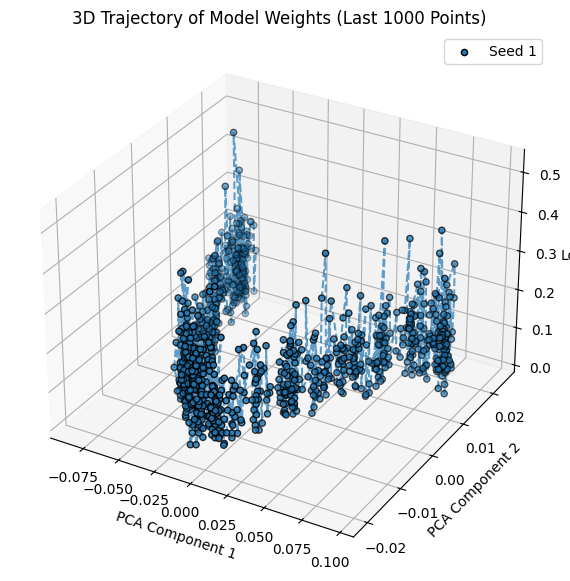

In [43]:
values_last = values[:, -last_n:, :, :]
losses_last = losses[:, -last_n:]

# Преобразуем (num_seeds, last_n, W, H) -> (num_seeds * last_n, W*H)
values_flat = values_last.reshape(num_seeds * last_n, -1)

# PCA до 2D
pca = PCA(n_components=2)
trajectory_2d = pca.fit_transform(values_flat)

# Восстанавливаем размерность (num_seeds, last_n, 2)
trajectory_2d = trajectory_2d.reshape(num_seeds, last_n, 2)

# Визуализация
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Выбираем цветовую палитру (можно поменять на 'tab10', 'Set1', 'rainbow', 'viridis' и т.д.)
cmap = cm.get_cmap("tab10", num_seeds)
colors = [cmap(i) for i in range(num_seeds)]

for seed in range(num_seeds):
    sc = ax.scatter(
        trajectory_2d[seed, :, 0], trajectory_2d[seed, :, 1], losses_last[seed, :],
        color=colors[seed], label=f"Seed {seed+1}", edgecolors='k'
    )
    ax.plot(
        trajectory_2d[seed, :, 0], trajectory_2d[seed, :, 1], losses_last[seed, :],
        linestyle='--', alpha=0.7, color=colors[seed]
    )

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("Loss")
ax.set_title(f"3D Trajectory of Model Weights (Last {last_n} Points)")
ax.legend()

plt.show()

/var/folders/nn/by81v1n504z14cq7hr74_5g80000gn/T/ipykernel_43201/3439467818.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", num_seeds)


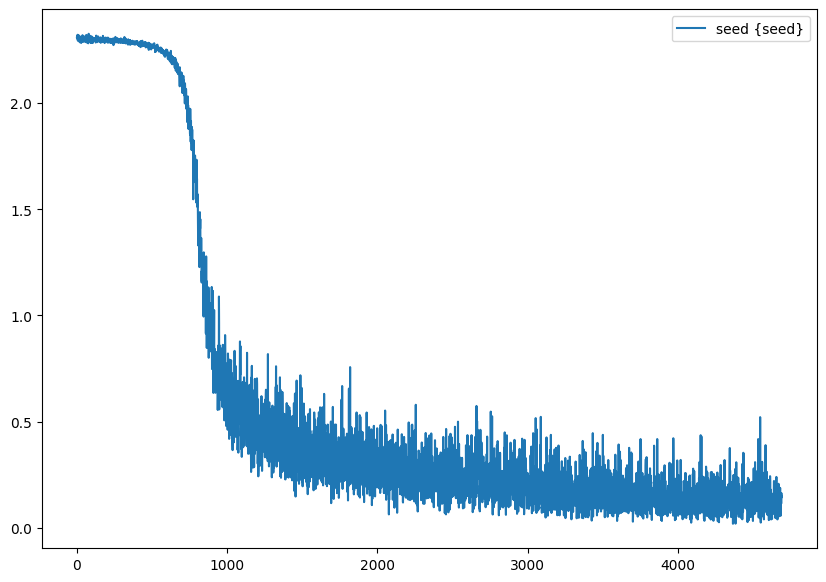

In [48]:
# Визуализация
plt.figure(figsize=(10, 7))
cmap = cm.get_cmap("tab10", num_seeds)
colors = [cmap(i) for i in range(num_seeds)]
for seed in range(num_seeds):
    plt.plot(losses[seed], label='seed {seed}', color = colors[seed] )

plt.legend()
plt.show()